In [1]:
#Rodar Primeiro - Ler os nomes das imagens nos diretórios
import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
import os
from skimage import data
from skimage.filters import threshold_otsu,threshold_local,threshold_li
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score,f1_score
from statistics import mean 
%matplotlib inline

#folder_img = "C:/Users/Administrador/Pictures/Doutorado_img/Segmentation/img/"

#folder_img="D:/Users/N30090/OneDrive/UFES-Elétrica/Implementação Browning Index/IDAT/BI_Benignas_BBOBMO_PWBHEPL/"
#folder_img="D:/Users/N30090/OneDrive/UFES-Elétrica/Implementação Browning Index/IDAT/BI_Malignas_BBOBMO_PWBHEPL/"
folder_img="D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/U-net/train/images/"

images = []
for filename in os.listdir(folder_img):
    img = imread(os.path.join(folder_img,filename))
    if img is not None:
        images.append(filename)
num = len(images)
print(num)

450


In [6]:
import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow,imsave
from skimage.transform import resize
from skimage.color import gray2rgb, rgb2gray
from skimage.segmentation import watershed
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import cv2 as cv
import os
from skimage import data
from skimage.filters import threshold_otsu,threshold_local,threshold_li,threshold_mean
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score,f1_score
from statistics import mean 
%matplotlib inline

jac_otsu = []
f1_otsu  = []
jac_lloyd = []
f1_lloyd = []
binary_BIlloyd = []
f1_score_water = []
jac_water = []
precision_otsu = []
precision_lloyd = []
precision_water = []
recall_otsu = []
recall_lloyd = []
recall_water = []
acc_otsu = []
acc_lloyd = []
acc_water = []
#num = 1
dim = 256
#path_out = 'C:/Users\Administrador/Pictures/Doutorado_img/Segmentation/out6/'

#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Benignas_BBOBMO_PWBHEPL_Aimonino/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Benignas_BBOBMO_PWBHEPL_Fetuga/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Benignas_BBOBMO_PWBHEPL_Lunadei/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Benignas_BBOBMO_PWBHEPL_Aimonino+Fetuga+Lunadei/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Malignas_BBOBMO_PWBHEPL_Aimonino/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Malignas_BBOBMO_PWBHEPL_Fetuga/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Malignas_BBOBMO_PWBHEPL_Lunadei/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/BI_Malignas_BBOBMO_PWBHEPL_Aimonino+Fetuga+Lunadei/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/U-net/train/images_aimonino/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/U-net/train/images_fetuga/"
#path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/U-net/train/images_lunadei/"
path_out = "D:/Users/N30090/OneDrive - ArcelorMittal/Pictures/Doutorado_img/U-net/train/images_Ai_Fe_Lu/"
for i in range (0,num,1): 
    img = imread(folder_img+images[i])
    img = resize(img, (dim, dim))
    #gt = imread (folder_img+images[i+1])
    #gt = resize(gt, (dim, dim))
    #ret, gt = cv.threshold(gt, 0, 255, cv.THRESH_BINARY)
    print(i)
###################################################################################
    # Remoção de Pelos
    '''
    grayScale = rgb2gray(img)
    kernel = cv.getStructuringElement(1,(20,20))
    blackhat = cv.morphologyEx(grayScale, cv.MORPH_BLACKHAT, kernel)
    ret,thresh2 = cv.threshold(blackhat,10,255,cv.THRESH_BINARY)
    img = cv.inpaint(img,thresh2,1,cv.INPAINT_TELEA)
    '''
##################################################################################
    R,G,B=cv.split(img)
    L,a,b=cv.split(img)
##################################################################################
    #j = 2 # 0: Aimonino | 1: Fetuga | 2: Lunadei
    # Browning Index Aimonino
    #if j==0:
    k = 1.7
    BIaimonino = np.dot(k,R)-G-B
    #    BI = cv.normalize(BIaimonino, None, 0, 1.0,cv.NORM_MINMAX, dtype=cv.CV_32F)
    # Browning Index Fetuga
    #if j==1:
    BIfetuga = 100 - L
    #    BI = cv.normalize(BIfetuga, None, 0, 1.0,cv.NORM_MINMAX, dtype=cv.CV_32F)
    # Browning Index Lunadei2
    #if j==2:
    BIlunadei2 = R-B
    #    BI = cv.normalize(BIlunadei2, None, 0, 1.0,cv.NORM_MINMAX, dtype=cv.CV_32F)
        
    new_img = (np.dstack((BIaimonino,BIfetuga,BIlunadei2)) * 255.999).astype(np.uint8)

    # pasta output
    #prefixo = '_BI_k2'
    p = path_out+images[i]
    #Salvando em PNG
    #plt.imsave(p, BI)
    plt.imsave(p, new_img)
##################################################################################      
    bin = 0 # 1: Otsu | 0: Sem
    # Binarização de Otsu
    if bin==1:
        '''
        blur = cv.GaussianBlur(BI,(3,3),0)
        # find normalized_histogram, and its cumulative distribution function
        hist = cv.calcHist([blur],[0],None,[256],[0,256])
        hist_norm = hist.ravel()/hist.sum()
        Q = hist_norm.cumsum()
        bins = np.arange(256)
        fn_min = np.inf
        thresh = -1
        for r in range(1,256):
            p1,p2 = np.hsplit(hist_norm,[r]) # probabilities
            q1,q2 = Q[r],Q[255]-Q[r] # cum sum of classes
            if q1 < 1.e-6 or q2 < 1.e-6:
                continue
            b1,b2 = np.hsplit(bins,[r]) # weights
            # finding means and variances
            m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
            v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
            # calculates the minimization function
            fn = v1*q1 + v2*q2
            if fn < fn_min:
                fn_min = fn
                thresh = r
        '''
        #binary_BIai     = BI > thresh
        binary_BIai     = BI > threshold_otsu(BI)
        ai = np.uint8(binary_BIai)
        im_rgb = cv.bitwise_and(img, img, mask=ai)
        #pasta output
        #prefixo = '_Otsu_BI_k2'
        q = path_out+images[i]#+".png"
        #Salvando em PNG
        plt.imsave(q, im_rgb)
##################################################################################
    water = 0 # 1: Watershed | 0: Sem
    # Binarização Watershed
    if water==1:
        
        binary_BIai     = BI > threshold_li(BI)
        ai = np.uint8(binary_BIai)
        im_rgb = cv.bitwise_and(img, img, mask=ai)
        
        #pasta output
        #prefixo = '_Otsu_BI_k2'
        q = path_out+images[i]#+".png"
        #Salvando em PNG
        plt.imsave(q, im_rgb)
##################################################################################
    binL = 0 # 1: Lloyd | 0: Sem
    # Binarização de Lloyd
    if binL==1:
        L = 256
        TotalPixels = BI.size
        size = BI.shape
        altura = size[0]
        largura = size[1]
        TotalPixels = altura * largura

        histo, bin_edges = np.histogram(BI,bins=L)
        Prob = []
        for s in range(L):
            Prob.append(0.0)
        
        SomaMedia = 0
        for s in range(L):
            SomaMedia = SomaMedia + histo[s]*s
            Prob[s]=histo[s]/TotalPixels

        Media = SomaMedia/TotalPixels

        LimiarIni = round(Media)
        LimiarAux = -1
        Limiar = LimiarIni
        '''
        while (LimiarAux != Limiar):
            Soma1 = 0
            N1 = 0
            Soma2 = 0
            N2 = 0
            for t in range(0,Limiar+1):
                N1 = N1 + histo[t]
                Soma1 = Soma1 + histo[t]*t
            for u in range(Limiar+1,256):
                N2 = N2 + histo[u]
                Soma2 = histo[u]*u
            Z1b = Soma1/N1
            Z2b = Soma2/N2
            LimiarAux = Limiar
            if (not((Z1b==Z2b)and(N1==0)and(N2==0))):
                Z=Z1b-Z2b
                Variancia2 = 0.5*Z*Z/np.log10(N1+N2)
                Limiar = int(0.5*(Z1b+Z2b)+(Variancia2/(Z1b - Z2b))*(np.log10(N2) - np.log10(N1)))
        '''
        binary_BIai     = BI > threshold_mean(BI)
        ai = np.uint8(binary_BIai)
        im_rgb = cv.bitwise_and(img, img, mask=ai)
        #pasta output
        #prefixo = '_Otsu_BI_k2'
        q = path_out+images[i]#+".png"
        #Salvando em PNG
        plt.imsave(q, im_rgb)
##################################################################################
    '''
    jac_score_otsu = jaccard_score(gt, ai, average="micro")
    jac_otsu.append(jac_score_otsu)
    
    intersect_otsu = np.sum(np.logical_and(ai, gt))
    union_otsu = np.sum(np.logical_or(ai, gt))
    xor_otsu = np.sum(gt==ai)
    acc_score_otsu = np.mean(xor_otsu/(union_otsu + xor_otsu - intersect_otsu))
    acc_otsu.append(acc_score_otsu)
    
    dice_otsu = f1_score(gt, ai, average="micro")
    f1_otsu.append(dice_otsu)
        
    jac_score_lloyd = jaccard_score(gt, lloyd, average="micro")
    jac_lloyd.append(jac_score_lloyd)
    
    intersect_lloyd = np.sum(np.logical_and(lloyd, gt))
    union_lloyd = np.sum(np.logical_or(lloyd, gt))
    xor_lloyd = np.sum(gt==lloyd)
    acc_score_lloyd = np.mean(xor_lloyd/(union_lloyd + xor_lloyd - intersect_lloyd))
    acc_lloyd.append(acc_score_lloyd)
    
    dice_lloyd = f1_score(gt, lloyd, average="micro")
    f1_lloyd.append(dice_lloyd)
    
    jac_score_water = jaccard_score(gt, watershed, average="micro")
    jac_water.append(jac_score_water)
    
    intersect_water = np.sum(np.logical_and(watershed, gt))
    union_water = np.sum(np.logical_or(watershed, gt))
    xor_water = np.sum(gt==watershed)
    acc_score_water = np.mean(xor_water/(union_water + xor_water - intersect_water))
    acc_water.append(acc_score_water)
    
    f1_water = f1_score(gt, watershed, average="micro")
    f1_score_water.append(f1_water)
##################################################################################
print('Jaccard Score - BI + Otsu: ',mean(jac_otsu))
print('ACC - BI + Otsu: ',mean(acc_otsu))
print('F1 Score - BI + Otsu: ',mean(f1_otsu))
print('\n')
print('Jaccard Score - BI + Lloyd: ',mean(jac_lloyd))
print('ACC - BI + Otsu: ',mean(acc_lloyd))
print('F1 Score - BI + Lloyd: ',mean(f1_lloyd))
print('\n')
print('Jaccard Score - BI + Watershed: ',mean(jac_water))
print('ACC - BI + Otsu: ',mean(acc_water))
print('F1 Score - BI + Watershed: ',mean(f1_score_water))
'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

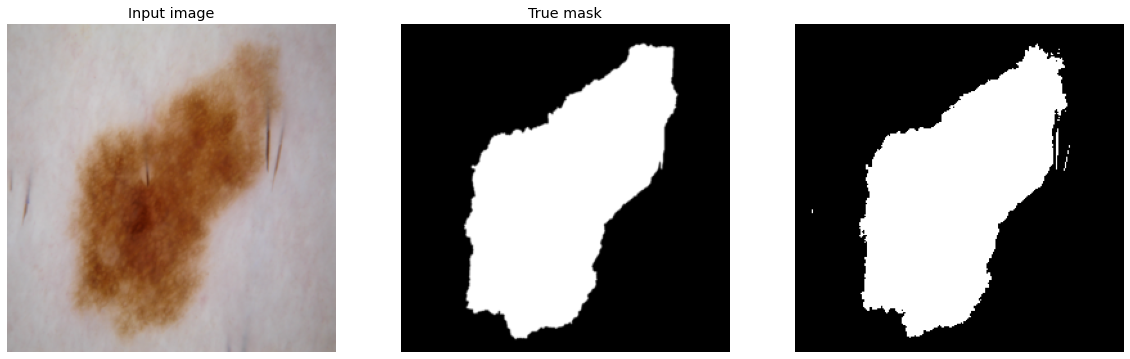

In [31]:
#--------------------------------Accuracy_BI_New_Image_Com Máscara_RGB_Com remoção de pelos-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
from skimage.transform import resize
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local,threshold_li,threshold_multiotsu
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score,f1_score
from statistics import mean
%matplotlib inline
dim = 256
img = imread('C:/Users/Administrador/Pictures/Doutorado_img/Segmentation/img/ISIC_0000419.jpg')
img = resize(img, (dim, dim))
gt = imread ('C:/Users/Administrador/Pictures/Doutorado_img/Segmentation/img/ISIC_0000419_Segmentation.png')
gt = resize(gt, (dim, dim))

##########################################################################################
# Convert the original image to grayscale
#grayScale = cv.cvtColor(img, cv.COLOR_RGB2GRAY )
# Kernel for the morphological filtering
#kernel = cv.getStructuringElement(1,(20,20))
# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
#blackhat = cv.morphologyEx(grayScale, cv.MORPH_BLACKHAT, kernel)
# intensify the hair countours in preparation for the inpainting 
# algorithm
#ret,thresh2 = cv.threshold(blackhat,10,255,cv.THRESH_BINARY)
#dst = cv.inpaint(img,thresh2,1,cv.INPAINT_TELEA)
##################################################################################
R,G,B=cv.split(img)
L,a,b=cv.split(img)
##################################################################################
k = 1 # 0: Aimonino | 1: Fetuga | 2: Lunadei
# Browning Index Aimonino
if k==0:
    BIaimonino = 2.*R-G-B
    BI = cv.normalize(BIaimonino, None, 0, 255,cv.NORM_MINMAX, dtype=cv.CV_32F)
# Browning Index Fetuga
if k==1:
    BIfetuga = 100 - L
    BI = cv.normalize(BIfetuga, None, 0, 255,cv.NORM_MINMAX, dtype=cv.CV_32F)
    # Browning Index Lunadei2
if k==2:
    BIlunadei2 = R-B
    BI = cv.normalize(BIlunadei2, None, 0, 255,cv.NORM_MINMAX, dtype=cv.CV_32F)

#########################################################################################
# Binarização de Otsu
binary_BIai     = BI > threshold_otsu(BI)
ai = np.uint8(binary_BIai)
masked_ai = cv.bitwise_and(img, img, mask=ai)
#########################################################################################
# Binarização Watershed
gray =np.invert(np.uint8(BI))#cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, watershed = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
masked_watershed = cv.bitwise_and(img, img, mask=watershed)
#########################################################################################
# Binarização de Lloyd
L = 256
TotalPixels = BI.size
size = BI.shape
altura = size[0]
largura = size[1]
TotalPixels = altura * largura

#histo, bin_edges = np.histogram(BI,bins=L)
histo = cv.calcHist([BI],[0],None,[256],[0,256])
Prob = []
for i in range(L):
    Prob.append(0.0)
    
SomaMedia = 0
for i in range(L):
    SomaMedia = SomaMedia + histo[i]*i
    Prob[i]=histo[i]/TotalPixels

Media = SomaMedia/TotalPixels
'''
LimiarIni = Media
LimiarAux = -1
Limiar = LimiarIni

while (LimiarAux != Limiar):
    Soma1 = 0
    N1 = 0
    Soma2 = 0
    N2 = 0
    for i in range(0,int(Limiar)+1):
        N1 = N1 + histo[i]
        Soma1 = Soma1 + histo[i]*i
    for i in range(int(Limiar)+1,256):
        N2 = N2 + histo[i]
        Soma2 = histo[i]*i
    Z1b = Soma1/N1
    Z2b = Soma2/N2
    LimiarAux = Limiar
    if N1>0: #(not((Z1b==Z2b)and(N1==0)and(N2==0))):
        Z=Z1b-Z2b
        Variancia2 = (0.5*Z*Z)/np.log10(N1+N2)
        Limiar = int(0.5*(Z1b+Z2b)+(Variancia2/(Z1b - Z2b))*(np.log10(N2) - np.log10(N1)))
'''
binary_BIlloyd = BI > Media+25
lloyd = np.uint8(binary_BIlloyd)
########################################################################################

plt.figure(figsize=(20, 10))

plt.rcParams.update({'font.size': 12})

plt.subplot(1,3,1), plt.imshow(img)
plt.title('Input image')
plt.axis('off')

plt.subplot(1,3,2), plt.imshow(gt, cmap=plt.cm.gray)
plt.title('True mask')
plt.axis('off')

plt.subplot(1,3,3), plt.imshow(binary_BIlloyd, cmap=plt.cm.gray)
#plt.title('Predicted mask - Aimonino')
plt.axis('off')

plt.show()


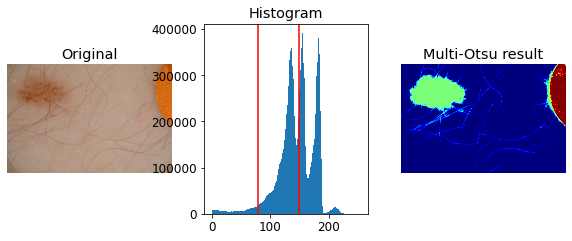

In [45]:
gray = BI
thresholds = threshold_multiotsu(gray,classes=3)
regions = np.digitize(gray, bins=thresholds)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

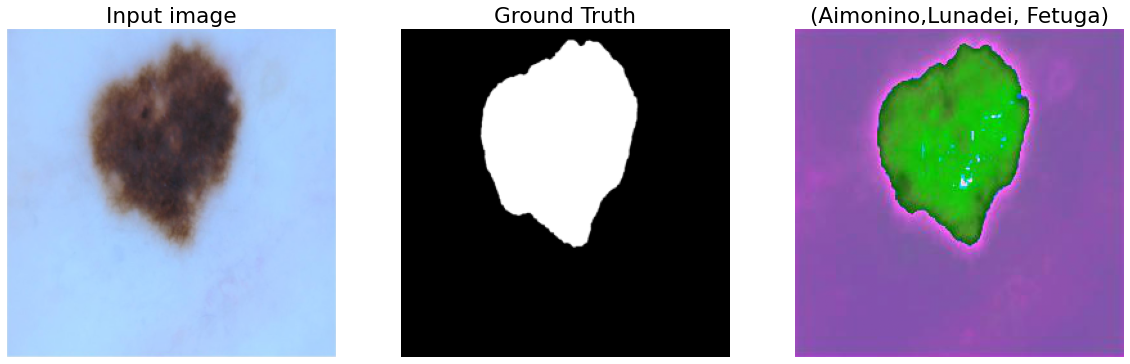

In [32]:
import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
from skimage.transform import resize
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local,threshold_li,threshold_multiotsu
from matplotlib import pyplot as plt
from sklearn.metrics import jaccard_score,f1_score
from statistics import mean
%matplotlib inline

dim = 256

img = imread('C:/Users/Administrador/Pictures/Doutorado_img/Segmentation/img/ISIC_0000016.jpg')
img = resize(img, (dim, dim))
gt = imread ('C:/Users/Administrador/Pictures/Doutorado_img/Segmentation/img/ISIC_0000016_Segmentation.png')
gt = resize(gt, (dim, dim))
new = imread ('C:/Users/Administrador/Pictures/Doutorado_img/Segmentation/out7/ISIC_0000016.jpg')
new = resize(new, (dim, dim))

plt.figure(figsize=(20, 10))

plt.rcParams.update({'font.size': 18})

plt.subplot(1,3,1), plt.imshow(img)
plt.title('Input image')
plt.axis('off')

plt.subplot(1,3,2), plt.imshow(gt, cmap=plt.cm.gray)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(1,3,3), plt.imshow(new)
plt.title('(Aimonino,Lunadei, Fetuga)')
plt.axis('off')

plt.show()

In [ ]:
#--------------------------------Accuracy_BI_New_Image_Com Máscara-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000002_BBOBMO.png')
R,G,B=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 1.8
BIaimonino = np.dot(k,R)-G-B
BI = BIaimonino
binary_BIai     = BI > threshold_otsu(BI)
ai = np.uint8(binary_BIai)
masked_ai = cv.bitwise_and(img, img, mask=ai)

red,green,blue=cv.split(masked_ai)
L,a,b=cv.split(masked_ai)

BIaimonino = np.dot(k,red)-green-blue
BIlunadei2 = (red-blue)
BIfetuga = L - 100

new_img = (np.dstack((BIaimonino,BIlunadei2,BIfetuga)) * 255.999).astype(np.uint8)
out = cv.bitwise_and(new_img, new_img, mask=ai)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original')

plt.subplot(1, 3, 2), plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('New image Sem Máscara')

plt.subplot(1, 3, 3), plt.imshow(out, cmap=plt.cm.gray)
plt.title('BI_New_Image_Com Mascara')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))

In [ ]:
#--------------------------------Accuracy_BI_New_Image-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000002_BBOBMO.png')
R,G,B=cv.split(img)
L,a,b=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 1.8
BIaimonino = np.dot(k,R)-G-B
BIlunadei2 = R-B
BIfetuga = L - 100

new_img = (np.dstack((BIaimonino,BIlunadei2,BIfetuga)) * 255.999).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(1, 2, 1), plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2), plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('BI_New_Image')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))

In [ ]:
#--------------------------------Accuracy_BI_New_Image-------------------------------------------------------

import numpy as np
import numpy as geek 
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage import data
from skimage.io import imread,imshow
import cv2 as cv
from skimage import data
from skimage.filters import threshold_otsu,threshold_local
from matplotlib import pyplot as plt
%matplotlib inline

#path_out_bem = "C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/BI_Malignas_BLWHER_SONARa/"


img = imread('C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/IDAT/Malignas_BLWHER_SONARa/ISIC_0000002_BBOBMO.png')
R,G,B=cv.split(img)
#Parâmetros conforme artigo Jacques
k = 2
BIaimonino = np.invert(k*R-G-B)
BI = BIaimonino
binary_BIai  = BI > threshold_otsu(BI)
ai = np.uint8(binary_BIai)
img_bi = cv.bitwise_and(img, img, mask=ai)
r,g,b=cv.split(img_bi)
ai = g+r+b
im_rgb = cv.cvtColor(ai, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 13})

plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original')
                       
plt.subplot(1, 3, 2), plt.imshow(img_bi)
plt.title('BI_New_Image')

plt.subplot(1, 3, 3), plt.imshow(im_rgb)
plt.title('BI_New_Image')

plt.show()

# pasta output
#prefixo = 'b'
#p = path_out_bem+prefixo+str(1).rjust(3,"0")+".png"
# Salvando em PNG
#imsave(p, np.uint8(out))